## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse = "mouse.csv"
study = "study.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse)
study = pd.read_csv(study)

# Combine the data into a single dataset
data_df = pd.merge(study, mouse, how="left", on=["Mouse ID", "Mouse ID"])

#Dropping any unknown values from the data set 
data_df = data_df.dropna(how='any')

# Display the data table for preview
data_df 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [41]:
#Printing a statistical overview of the data set 
data_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [42]:
# Checking the number of mice.
mouse_count = data_df['Mouse ID'].count()
#Creating a bin for the mouse count 
mouse_bin = {'Mouse Count':[mouse_count]}

#Creating a dataframe for the count 
mouse_bin = pd.DataFrame(mouse_bin)

#Displaying the dataframe
mouse_bin 

,Mouse Count
0,1893


In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID Timepoint. 
group_timepoint = data_df.groupby(['Timepoint'])["Mouse ID"].value_counts()

#Creating a dataframe 
group_timepoint = pd.DataFrame(group_timepoint)

#Renaming Mouse ID column header to Sum of Duplicates 
group_timepoint = group_timepoint.rename(columns={'Mouse ID':'Sum of Duplicates'})

#Displaying the dataframe 
group_timepoint

Sum of Duplicates
Timepoint Mouse ID                   
0         g989                      2
          a203                      1
          a251                      1
          a262                      1
          a275                      1
...                               ...
45        y865                      1
          z578                      1
          z581                      1
          z795                      1
          z969                      1

[1888 rows x 1 columns]

In [44]:
#Getting the duplicate mice by ID number that shows up for Timepoint
group_id = data_df.groupby(["Mouse ID"])['Timepoint'].value_counts()

#Creating a dataframe for the Duplicate ID value 
group_id = pd.DataFrame(group_id)

#Renaming Column header Timepoint to Sum of Duplicates 
group_id = group_id.rename(columns={'Timepoint':'Sum of Duplicates'})

#Displying the data frame
group_id


Sum of Duplicates
Mouse ID Timepoint                   
a203     0                          1
         5                          1
         10                         1
         15                         1
         20                         1
...                               ...
z969     25                         1
         30                         1
         35                         1
         40                         1
         45                         1

[1888 rows x 1 columns]

In [174]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_dup_data = data_df.groupby(lambda x:x, axis=1).sum()

#Grouping the complete data set including it's duplicates by Mouse id and dispalying the sum of each result 
complete_dup_data = complete_dup_data.groupby(["Mouse ID"]).sum()


#Displaying the dataframe 
complete_dup_data

,Age_months,Metastatic Sites,Timepoint,Tumor Volume (mm3),Weight (g)
Mouse ID,,,,,
a203,200,11,225,563.127077,230
a251,210,8,225,552.370946,250
a262,170,23,225,586.116306,290
a275,200,12,225,527.709651,280
a366,112,1,105,382.479341,203
...,...,...,...,...,...
z435,36,0,15,140.826641,78
z578,110,0,225,384.115100,160
z581,240,20,225,539.795837,250


In [175]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop_duplicates(['Mouse ID','Timepoint'],keep='last').sort_index()

#Displaying the dat frame 
clean_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [176]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data_df['Mouse ID'].count()

#Binning and Renaming the columns in the DataFrame 
clean_count_bin = {'Mouse Count':[clean_count]}

#Creating the DataFrame
clean_count_bin = pd.DataFrame(clean_count_bin)

#Displaying the DataFrame 
clean_count_bin

,Mouse Count
0,1888



## Summary Statistics

In [177]:
#Calulating the Standard Error Mean for Tumor Volume for each Drug Regimen
sem_data = clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

#Setting a variable equal to the calculated SEM
sem_summary = sem_data

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table = clean_data_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":
                                                          [np.mean, 
                                                           np.median, 
                                                           np.var, 
                                                           np.std,
                                                          ]
                                                         })

#Creating a dataframe 
stat_table = pd.DataFrame(stat_table)

#Adding SEM Column into the Summary Statistics table
stat_table['SEM of Tumor Volume (mm3)'] = sem_summary

#Dropping a level of the multi-index that was created from the agg function
stat_table.columns = stat_table.columns.droplevel()

#Renaming my column headers to give the data the correct labels
stat_table = stat_table.rename(columns={"mean":"Mean",
                                       "median":"Median",
                                       "var":"Variance",
                                       "std":"Std. Deviation",
                                       "":"SEM"})


#Adding a comment to give the table a Name 
stat_table.style.set_caption("TUMOR VOLUME (MM3) SUMMARY STATISTICS")

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

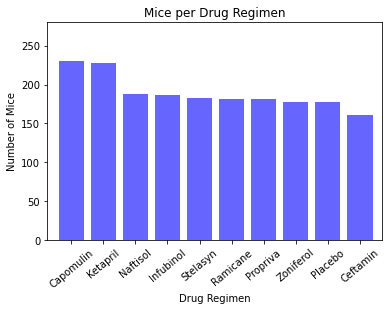

In [323]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Grabbing a count of mice from the cleaned up dataframe without duplicates 
mouse_count = data_df['Drug Regimen'].value_counts()

#unique strings for drug regimen 
drug_reg = data_df['Drug Regimen'].unique()

#Sets the x-axis labels to the unique drug regimen names listed in the data set 
x_axis = np.arange(0, len(drug_reg))

#empty that will hold the x-axis tick locations 
tick_locations = [] 

#for loop that will store each unique drug regiment on the x-axis 
for x in x_axis: 
    tick_locations.append(x)

#giving title/labels to the bar grap using pyplot 
plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#Setting the x limits of the bar graph
plt.xlim(-.75, len(drug_reg)-.30)

#counter space for our y-axis 
plt.ylim(0, max(mouse_count)+50)

#styling the graph 
plt.bar(x_axis, mouse_count,facecolor="blue",alpha=0.60, align="center")

plt.bar

#assigning tick values generated from our for loop 
plt.xticks(tick_locations,drug_reg)

#Rotating x-axis labels and aligning them to the center 
plt.xticks(rotation=40,horizontalalignment="center")

#showing the graph 
plt.show()

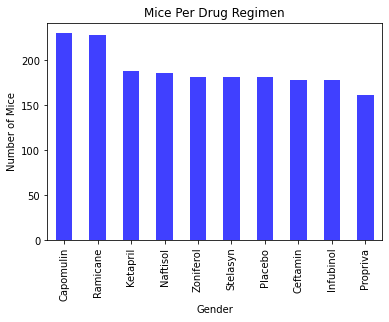

In [328]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Using the data generated from the previous cell
panda_bar_chart = mouse_count.plot(kind="bar",color="blue",alpha=0.75,title="Mice Per Drug Regimen")

#labeling my x axis 
panda_bar_chart.set_xlabel("Gender")

#labeling my y axis 
panda_bar_chart.set_ylabel("Number of Mice")

#showing my graph 
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
